# Barn og kropp

Barn og kropp, forskjeller. 
* hvilke kroppsdeler voksen vs. barn
* bruk av pronomen, possessiver

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('mods_meta')
import mods_meta as mm
mu.update('collocations')
import collocations as coll
import pandas as pd

Updated file `C:\Users\yoons\Documents\GitHub\Miscellaneous-Notebooks\Barn_kropp_Uri\mods_meta.py`

Updated file `C:\Users\yoons\Documents\GitHub\Miscellaneous-Notebooks\Barn_kropp_Uri\collocations.py`

In [2]:
corpus = mm.meta_natbib(children=True, yearfrom=2010, yearto=2020, limit=10000)

In [3]:
len(corpus)

6595

In [4]:
corpus_urns = [u[1] for u in corpus]

In [5]:
%time corpus_meta = pd.concat([nb.frame(mm.metadata(corpus_urns[i:i+1000])) for i in range(0, len(corpus_urns), 1000)], sort=False)

Wall time: 15.9 s


In [6]:
tot = nb.frame(nb.totals(50000), 'tot')
nb.normalize_corpus_dataframe(tot)

True

In [7]:
corpus_meta.to_csv('barnekorpus.csv')

In [22]:
sytten = [x for x in corpus_urns if str(x).startswith('2017')]

In [39]:
sytten_text = nb.get_corpus_text(sytten)

In [78]:
corpus_agg = pd.concat([nb.get_aggregated_corpus(corpus_urns[i:i+500]) for i in range(0, len(corpus_urns),500)], sort=False).sum(axis = 1)

In [93]:
corpus_sum = corpus_agg.groupby(corpus_agg.index).sum()

In [94]:
corpus_sum.to_csv('barnekorpus_aggregert.csv')

In [24]:
corpus_sum = pd.read_csv('barnekorpus_aggregert.csv', index_col=0)

In [25]:
corpus_sum

,0
3u■TH,1
AFORTSETTE,1
Ai3Hathch:,1
Amerykanami,1
"Beklager,",1
...,...
★,2734
☆,138
♦,7628
✓,1561


In [55]:
corpus_sum.loc[['hans',"hennes",'han','hun']]

,0
hans,221508
hennes,151939
han,1362229
hun,915626


In [56]:
tot.loc['hans']/tot.loc['hennes']

tot    2.645221
dtype: float64

In [59]:
tot.loc['han']/tot.loc['hun']

tot    2.30382
dtype: float64

In [57]:
corpus_sum.loc['hans']/corpus_sum.loc['hennes']

0    1.457875
dtype: float64

In [58]:
corpus_sum.loc['han']/corpus_sum.loc['hun']

0    1.487757
dtype: float64

In [18]:
corpus_agg = nb.frame(corpus_agg)

NameError: name 'corpus_agg' is not defined

In [126]:
nb.normalize_corpus_dataframe(corpus_sum)

True

In [50]:
sytten_sum = nb.frame(sytten_text.sum(axis = 1))

In [156]:
def relatert(w):
    try:
        res = nb.relaterte_ord(w)
    except:
        res = []
    return res

In [8]:
kroppsord = """håret nesen munnen tungen leppen leppene kinnet hjernen hjertet lungene
neglene neglen hendene øynene øyet øyenvippene øyenbrynene ansiktet pannen hodet halsen nakken skulderen skuldrene magen brystet brystene
fingrene tommelen ankelen foten tærne tåen tåa rumpa låret lårene leggene leggen knærne kneet armen hånden albuen fingeren fingrene
lemmet kjønnet grotten skjødet kuken fitta haken kjeven kjevene""".split()

In [466]:
kroppsord = list(set(kroppsord))
kroppsord

['lemmet',
 'magen',
 'lårene',
 'lungene',
 'ankelen',
 'fingrene',
 'leppen',
 'knærne',
 'albuen',
 'halsen',
 'kjeven',
 'fitta',
 'hånden',
 'øyenbrynene',
 'nakken',
 'kjevene',
 'kjønnet',
 'neglen',
 'øynene',
 'brystet',
 'håret',
 'rumpa',
 'hjertet',
 'tærne',
 'øyet',
 'øyenvippene',
 'hjernen',
 'brystene',
 'tommelen',
 'skuldrene',
 'tåa',
 'haken',
 'pannen',
 'tåen',
 'kuken',
 'fingeren',
 'kinnet',
 'armen',
 'låret',
 'foten',
 'hodet',
 'leppene',
 'leggene',
 'munnen',
 'tungen',
 'leggen',
 'hendene',
 'nesen',
 'kneet',
 'neglene',
 'grotten',
 'skjødet',
 'ansiktet',
 'skulderen']

# hans og hennes for diverse kroppsord

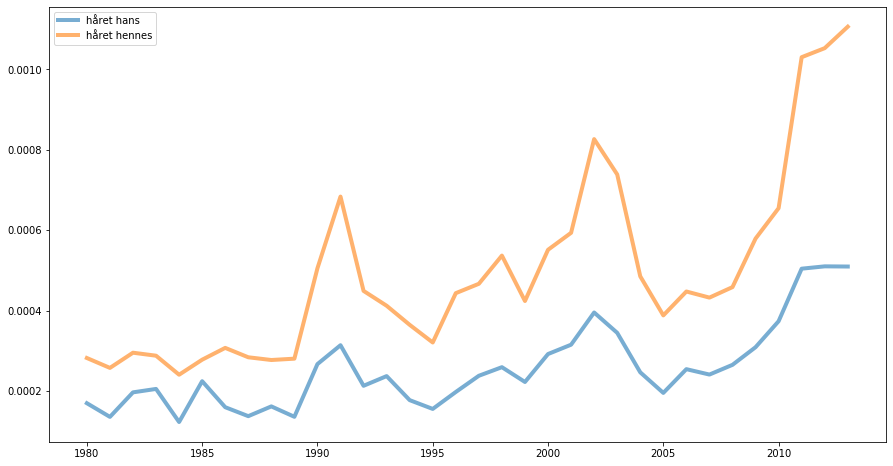

In [14]:
nb.nb_ngram('håret hans, håret hennes', years=(1980, 2020), smooth=1).plot(figsize=(15,8), lw=4, alpha=.6)

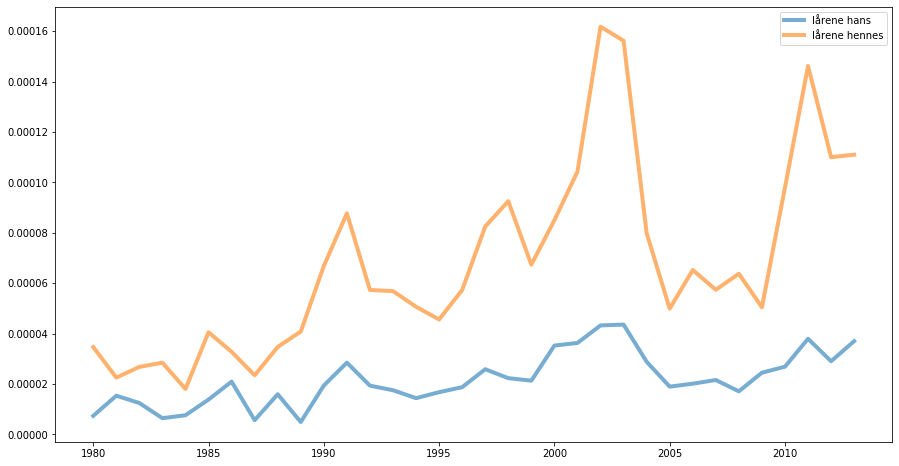

In [15]:
nb.nb_ngram('lårene hans, lårene hennes', years=(1980, 2020), smooth=1).plot(figsize=(15,8), lw=4, alpha=.6)

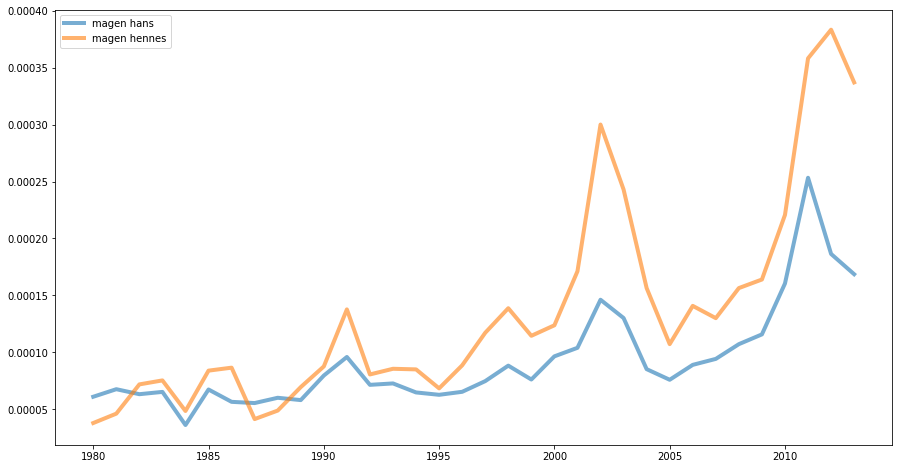

In [63]:
nb.nb_ngram('magen hans, magen hennes', years=(1980, 2020), smooth=1).plot(figsize=(15,8), lw=4, alpha=.6);

In [53]:
list(nb.frame_sort(corpus_sum.loc[kroppsord]).index).index('hjertet')

13

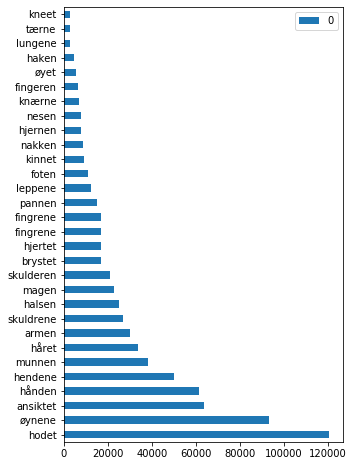

In [44]:
nb.frame_sort(corpus_sum.loc[kroppsord])[:30].plot(kind='barh', figsize=(5,8))

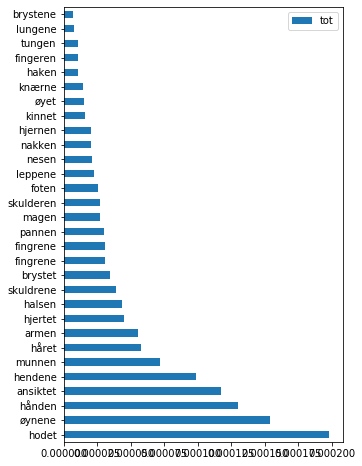

In [46]:
nb.frame_sort(tot.loc[[x for x in kroppsord if x in tot.index]])[:30].plot(kind='barh', figsize=(5,8))

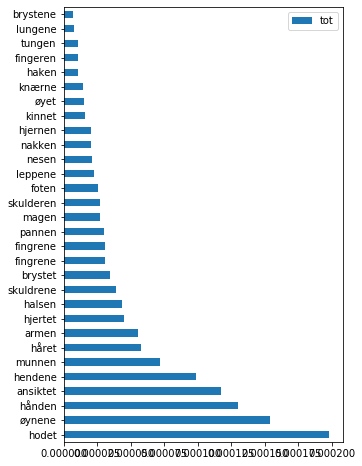

In [46]:
nb.frame_sort(tot.loc[[x for x in kroppsord if x in tot.index]])[:30].plot(kind='barh', figsize=(5,8))

In [189]:
def coll(w, before = 3, after = 3, corpus=corpus_urns, step = 500):
    return pd.concat([nb.urn_coll(w, urns = corpus_urns[i:i+step], after = after, before= before) for i in range(0, len(corpus_urns), step)], sort=False, axis = 1).sum(axis=1)

In [ ]:
from time import time

{}

In [468]:
t = time()
#colls_bigram = dict()
step = 50
for w in  kroppsord:
    if w not in colls_bigram:
        print(w)
        colls_bigram[w] = coll(w, after = 1, before= 0, step = step) 
        print(time() - t)
        t = time()

kjeven
33.47684335708618
kjevene
28.01794409751892
haken
37.03979682922363


In [469]:
t = time()
#colls_preceding = dict()
step = 50
for w in  kroppsord:
    if not w in colls_preceding:
        print(w)
        colls_preceding[w] = coll(w, after = 0, before= 10, step = step) 
        print(time() - t)
        t = time()

kjeven
25.65132713317871
kjevene
24.603899240493774
haken
26.330925226211548


In [470]:
colls_pre = nb.frame(colls_preceding).transpose()
colls_pre.to_csv('colls_preceding.csv')

In [471]:
bi_colls = nb.frame(colls_bigram).transpose()

In [472]:
bi_colls.to_csv('bicolls_after1_before0.csv')

In [473]:
bi_colls.loc[[w for w in 'hans hennes min mitt mine din ditt dine vår våre vårt'.split() if w in bi_colls.index]].transpose().fillna(0).style.background_gradient(axis=1)

,hans,hennes,min,mitt,mine,din,ditt,dine,vår,våre,vårt
lemmet,3,0,0,1,0,0,0,0,0,0,0
magen,798,738,993,0,1,156,0,0,2,0,0
lårene,47,98,0,0,66,0,0,1,0,7,0
lungene,186,144,0,0,320,0,0,32,0,18,0
ankelen,84,75,92,0,0,24,0,0,0,0,0
fingrene,938,693,0,0,1034,0,0,118,0,81,0
leppen,23,11,13,0,0,5,0,0,0,0,0
knærne,137,116,0,0,250,0,0,14,0,24,0
albuen,87,55,101,0,0,8,0,0,0,0,0
halsen,1996,1190,806,0,0,133,0,0,8,0,0


In [474]:
nb.normalize_corpus_dataframe(bi_colls)

True

In [526]:
genitives = corpus_sum.loc['hans hennes min mi mitt mine din di ditt dine vår våre vårt'.split()]

In [476]:
pronouns = corpus_sum.loc['han hun vi de jeg du'.split()]

In [527]:
pronouns

,0
han,0.008149
hun,0.005477
vi,0.003073
de,0.005488
jeg,0.009295
du,0.005304


In [478]:
pron_colls = colls_pre.loc[[w for w in pronouns.index if w in colls_pre.index]]

In [479]:
pron_colls.transpose().fillna(0).style.background_gradient(axis=1)

,han,hun,vi,de,jeg,du
håret,2630,2862,276,1052,2364,1008
neglene,121,200,28,337,160,78
neglen,20,24,1,3,33,11
hendene,5638,4028,696,3978,4164,1329
øynene,9121,8086,889,12146,9548,2537
øyet,494,244,61,152,341,155
øyenvippene,17,29,2,96,23,6
øyenbrynene,263,193,51,328,239,107
ansiktet,6362,4875,451,1825,5407,1232
pannen,1515,1044,180,366,1055,526


In [528]:
genitives

,0
hans,0.001325
hennes,0.000909
min,0.000914
mi,0.000117
mitt,0.000495
mine,0.000443
din,0.000534
di,0.000057
ditt,0.000174
dine,0.000162


In [524]:
gen_colls = bi_colls.loc[[w for w in 'hans hennes min mitt mine mi din ditt dine di vår våre vårt'.split() if w in bi_colls.index]]

In [529]:
nb.normalize_corpus_dataframe(gen_colls)

True

In [530]:
gen_colls.div(genitives[0], axis=0).transpose().style.background_gradient(axis=1)

,di,din,dine,ditt,hans,hennes,mi,min,mine,mitt,vår,våre,vårt
lemmet,0,0,0,0,566.011,0,0,0,0,504.832,0,0,0
magen,0,108.598,0,0,223.963,301.96,3.19085,404.149,0.83909,0,3.17788,0,0
lårene,0,0,28.114,0,161.964,492.341,0,0,679.984,0,0,212.566,0
lungene,0,0,281.462,0,200.53,226.333,0,0,1031.46,0,0,171.007,0
ankelen,0,163.367,0,0,230.521,300.063,0,366.132,0,0,0,0,0
fingrene,0,0,253.674,0,247.169,266.222,0,0,814.604,0,0,188.084,0
leppen,0,179.992,0,0,333.801,232.741,0,273.604,0,0,0,0,0
knærne,0,0,159.33,0,191.111,235.909,0,0,1042.66,0,0,295.021,0
albuen,0,59.6627,0,0,261.583,241.086,0,440.383,0,0,0,0,0
halsen,0,60.2384,0,0,364.467,316.785,0,213.429,0,0,8.27034,0,0


In [531]:
gender_collocations = gen_colls.div(genitives[0], axis=0).transpose()
gender_collocations

,di,din,dine,ditt,hans,hennes,mi,min,mine,mitt,vår,våre,vårt
lemmet,0.000000,0.000000,0.000000,0.000000,566.010838,0.000000,0.000000,0.000000,0.000000,504.831565,0.000000,0.000000,0.000000
magen,0.000000,108.597705,0.000000,0.000000,223.962637,301.959846,3.190849,404.148992,0.839090,0.000000,3.177882,0.000000,0.000000
lårene,0.000000,0.000000,28.114020,0.000000,161.963528,492.340539,0.000000,0.000000,679.984460,0.000000,0.000000,212.565794,0.000000
lungene,0.000000,0.000000,281.461507,0.000000,200.529554,226.333108,0.000000,0.000000,1031.456947,0.000000,0.000000,171.007012,0.000000
ankelen,0.000000,163.367401,0.000000,0.000000,230.520778,300.062833,0.000000,366.132421,0.000000,0.000000,0.000000,0.000000,0.000000
fingrene,0.000000,0.000000,253.674062,0.000000,247.168606,266.221948,0.000000,0.000000,814.604288,0.000000,0.000000,188.083830,0.000000
leppen,0.000000,179.992128,0.000000,0.000000,333.801264,232.741044,0.000000,273.604391,0.000000,0.000000,0.000000,0.000000,0.000000
knærne,0.000000,0.000000,159.330104,0.000000,191.111484,235.908919,0.000000,0.000000,1042.658073,0.000000,0.000000,295.021340,0.000000
albuen,0.000000,59.662729,0.000000,0.000000,261.582698,241.086340,0.000000,440.383163,0.000000,0.000000,0.000000,0.000000,0.000000
halsen,0.000000,60.238353,0.000000,0.000000,364.467339,316.785425,0.000000,213.428637,0.000000,0.000000,8.270336,0.000000,0.000000


In [532]:
pron_colls.div(pronouns[0], axis=0).transpose().fillna(0).style.background_gradient(axis=1)

,han,hun,vi,de,jeg,du
håret,322744,522522,89801.9,191684,254336,190045
neglene,14848.7,36514.5,9110.34,61404.6,17213.9,14705.9
neglen,2454.33,4381.73,325.369,546.628,3550.38,2073.91
hendene,691875,735401,226457,724829,447993,250566
øynene,1.1193e+06,1.47628e+06,289253,2.21312e+06,1.02724e+06,478319
øyet,60621.9,44547.6,19847.5,27695.8,36687.2,29223.2
øyenvippene,2086.18,5294.6,650.739,17492.1,2474.5,1131.22
øyenbrynene,32274.4,35236.4,16593.8,59764.7,25713.3,20173.5
ansiktet,780722,890040,146742,332532,581724,232278
pannen,185915,190605,58566.5,66688.7,113504,99170.5


In [533]:
genderframe = gen_colls.loc[['hans','hennes']].div(genitives.loc[['hans','hennes']][0], axis=0).transpose()

In [534]:
pronounframe = pron_colls.loc[['han','hun']].div(pronouns.loc[['han','hun']][0], axis=0).transpose()

In [535]:
genderframe['gender'] = genderframe['hans']/genderframe['hennes']

In [536]:
pronounframe['gender'] = pronounframe['han']/pronounframe['hun']

In [537]:
pronounframe.sort_values(by='gender').style.applymap(lambda x: color_gender(x, 0.3), subset = ['gender'])

,han,hun,gender
kjønnet,122.716,547.717,0.224051
fitta,122.716,365.145,0.336076
øyenvippene,2086.18,5294.6,0.394021
neglene,14848.7,36514.5,0.406652
lemmet,245.433,547.717,0.448102
leppen,12026.2,25195,0.477326
brystene,6503.97,11867.2,0.548063
leggene,6135.82,11136.9,0.550945
neglen,2454.33,4381.73,0.560127
tåen,2086.18,3468.87,0.6014


In [538]:
genderframe

,hans,hennes,gender
lemmet,566.010838,0.000000,inf
magen,223.962637,301.959846,0.741697
lårene,161.963528,492.340539,0.328966
lungene,200.529554,226.333108,0.885993
ankelen,230.520778,300.062833,0.768242
fingrene,247.168606,266.221948,0.928431
leppen,333.801264,232.741044,1.434217
knærne,191.111484,235.908919,0.810107
albuen,261.582698,241.086340,1.085017
halsen,364.467339,316.785425,1.150518


In [493]:
def color_gender(val, threshold = 0.2):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if val - 1 > threshold:
        color = '#3CD7E7'
    elif 1 - val > threshold:
        color = '#E74C3C'
    else:
        color = '#82E73C'
    return 'background-color: %s' % color

In [494]:
genderframe.sort_values(by='gender').style.applymap(lambda x: color_gender(x, 0.3), subset = ['gender'])

,hans,hennes,gender
skjødet,0,1100.23,0
grotten,0,440.092,0
fitta,0,1100.23,0
brystene,0,633.733,0
neglene,93.459,418.973,0.223067
lårene,161.964,492.341,0.328966
neglen,98.4367,239.181,0.411558
leggene,142.676,322.953,0.441785
håret,180.562,392.065,0.460541
øyenvippene,251.56,517.755,0.485867


In [495]:
genderframe

,hans,hennes,gender
lemmet,566.010838,0.000000,inf
magen,224.045957,302.072183,0.741697
lårene,161.963528,492.340539,0.328966
lungene,200.529554,226.333108,0.885993
ankelen,230.520778,300.062833,0.768242
fingrene,247.168606,266.221948,0.928431
leppen,333.801264,232.741044,1.434217
knærne,191.111484,235.908919,0.810107
albuen,261.582698,241.086340,1.085017
halsen,364.467339,316.785425,1.150518


In [496]:
genframe = gender_collocations

In [497]:
newframe = pd.DataFrame()

In [498]:
newframe['min'] = genframe[['min', 'mitt', 'mine']].mean(axis=1)

In [499]:
newframe['din'] = genframe[['din', 'ditt', 'dine']].mean(axis=1)

In [500]:
newframe['vår'] = genframe[['vår', 'vårt', 'våre']].mean(axis=1)

In [501]:
newframe['hans'] = genframe.hans
newframe['hennes'] = genframe.hennes

In [502]:
newframe.style.background_gradient(axis=1)

,min,din,vår,hans,hennes
lemmet,168.277,0,0,566.011,0
magen,135.046,36.2127,1.05969,224.046,302.072
lårene,226.661,9.37134,70.8553,161.964,492.341
lungene,343.819,93.8205,57.0023,200.53,226.333
ankelen,122.044,54.4558,0,230.521,300.063
fingrene,271.535,84.558,62.6946,247.169,266.222
leppen,91.2015,59.9974,0,333.801,232.741
knærne,347.553,53.11,98.3404,191.111,235.909
albuen,146.794,19.8876,0,261.583,241.086
halsen,71.1429,20.0795,2.75678,364.467,316.785


In [503]:
x = list(newframe.loc['håret'].values)
x + [x[0]]

[213.49412466900074,
 156.22346794033473,
 19.261005453729762,
 180.56200334016967,
 392.06462625683673,
 213.49412466900074]

In [504]:
newframe.loc['håret'].values + [newframe.loc['håret'].values[0]]

array([426.98824934, 369.71759261, 232.75513012, 394.05612801,
       605.55875093])

In [505]:
def polar_plot_diagram(newframe):
    import matplotlib.pyplot as plt
    import numpy as np

    categories = newframe.columns
    words = list(newframe.index)
    points  = len(categories) 
    
    # Initialise the spider plot by setting figure size and polar projection
    plt.figure(figsize=(10, 6))
    
    plt.subplot(polar=True)

    theta = np.linspace(0, 2 * np.pi, points + 1)

    # Arrange the grid into number of sales equal parts in degrees
    lines, labels = plt.thetagrids(range(0, 360, int(360/points)), categories)
    for w in words:
        x = list(newframe.loc[w].values)
        x = x + [x[0]]
        plt.plot(theta, x)
        plt.fill(theta, x, 'b', alpha=0.1)

    # Add legend and title for the plot
    plt.legend(labels=tuple(words), loc=1)
    plt.title("Kroppsord")

    # Dsiplay the plot on the screen
    plt.show()

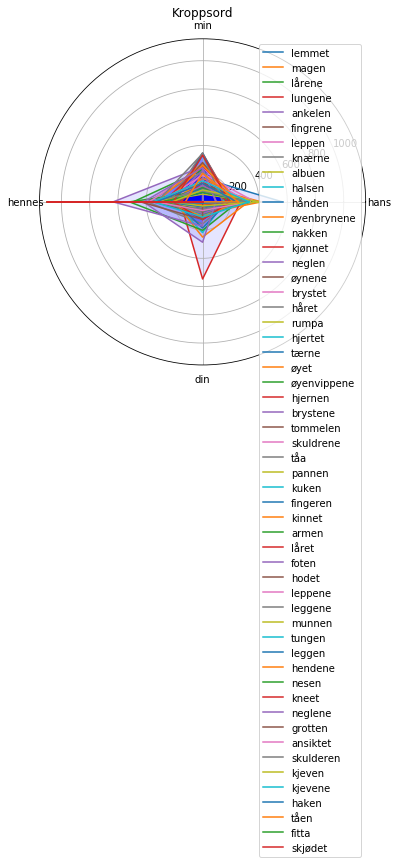

In [506]:
polar_plot_diagram(newframe[['hans','min','hennes','din']])

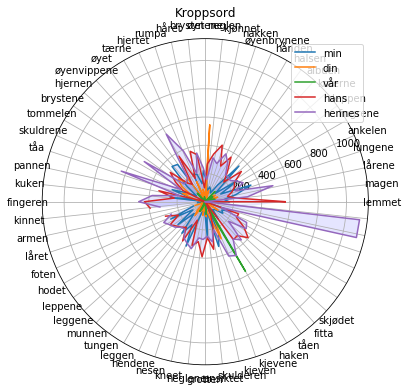

In [507]:
polar_plot_diagram(newframe.transpose())

In [508]:
hh = newframe[['hans', 'hennes','min', 'din']].transpose()

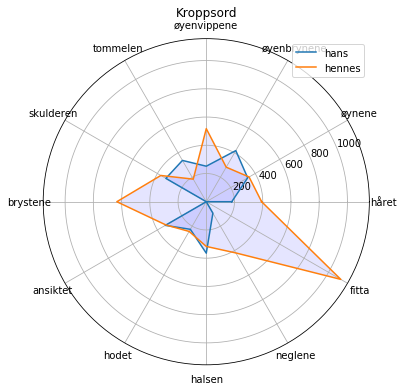

In [509]:
polar_plot_diagram(hh.loc[["hans","hennes"]][['håret', 'øynene', 'øyenbrynene', 'øyenvippene','tommelen', 'skulderen','brystene', 'ansiktet','hodet','halsen',"neglene",'fitta']])

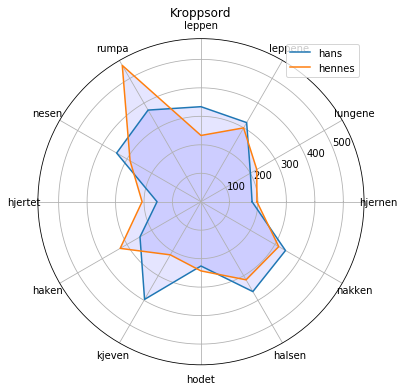

In [523]:
polar_plot_diagram(hh.loc[["hans","hennes"]][['hjernen', 'lungene', 'leppene', 'leppen','rumpa','nesen','hjertet','haken', 'kjeven','hodet','halsen','nakken']])

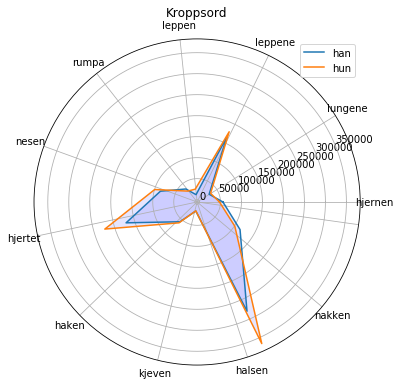

In [542]:
polar_plot_diagram(pronounframe.transpose().loc[["han","hun"]][['hjernen', 'lungene', 'leppene', 'leppen','rumpa','nesen','hjertet','haken', 'kjeven','halsen','nakken']])

In [511]:
hh

,lemmet,magen,lårene,lungene,ankelen,fingrene,leppen,knærne,albuen,halsen,...,neglene,grotten,ansiktet,skulderen,kjeven,kjevene,haken,tåen,fitta,skjødet
hans,566.010838,224.045957,161.963528,200.529554,230.520778,247.168606,333.801264,191.111484,261.582698,364.467339,...,93.458962,0.000000,334.973285,330.627862,396.207587,327.690485,247.278494,251.560373,0.000000,0.000000
hennes,0.000000,302.072183,492.340539,226.333108,300.062833,266.221948,232.741044,235.908919,241.086340,316.785425,...,418.973182,440.092155,329.717529,371.796020,215.461784,347.441175,327.728201,122.247821,1100.230389,1100.230389
min,168.277188,135.046249,226.661487,343.818982,122.044140,271.534763,91.201464,347.552691,146.794388,71.142879,...,242.163525,0.000000,150.458746,77.470088,85.121366,148.441584,130.916143,202.669919,0.000000,0.000000
din,0.000000,36.212702,9.371340,93.820502,54.455800,84.558021,59.997376,53.110035,19.887576,20.079451,...,285.927421,124.794542,61.534100,7.245501,28.598749,108.017026,8.850677,0.000000,0.000000,0.000000
